# Bengali.AI
-----
### Quick data exploration

Credits to Peter for providing this Notebook.

### About the Competition

Bengali is the 5th most spoken language in the world with hundreds of million of speakers. It’s the official language of Bangladesh and the second most spoken language in India. Considering its reach, there’s significant business and educational interest in developing AI that can optically recognize images of the language handwritten. This challenge hopes to improve on approaches to Bengali recognition.

Optical character recognition is particularly challenging for Bengali. While Bengali has 49 letters (to be more specific 11 vowels and 38 consonants) in its alphabet, there are also 18 potential diacritics, or accents. This means that there are many more graphemes, or the smallest units in a written language. The added complexity results in ~13,000 different grapheme variations (compared to English’s 250 graphemic units).

For this competition, we’re given the image of a handwritten Bengali grapheme and are challenged to separately classify three constituent elements in the image: grapheme root, vowel diacritics, and consonant diacritics.

In [1]:
import os
import pandas as pd
import numpy as np
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont

import plotly.graph_objects as go
import matplotlib.pyplot as plt

In [2]:
HEIGHT = 137
WIDTH = 236

In [3]:
def load_as_npa(file):
    df = pd.read_parquet(file)
    return df.iloc[:, 0], df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH)

def image_from_char(char):
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype('/kaggle/input/bengaliai/hind_siliguri_normal_500.ttf', 120)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH - w) / 2,(HEIGHT - h) / 2), char, font=myfont)

    return image

In [4]:
image_ids0, images0 = load_as_npa('/kaggle/input/bengaliai-cv19/train_image_data_0.parquet')

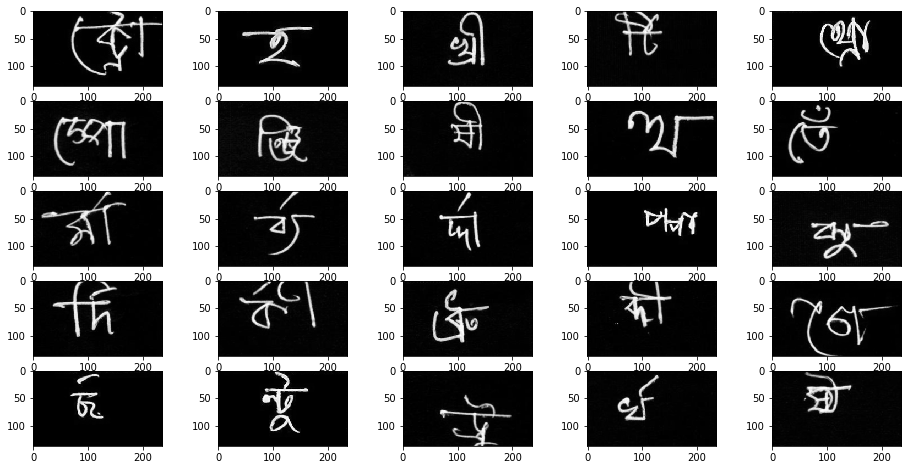

In [5]:
f, ax = plt.subplots(5, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(images0[i], cmap='Greys')

### train.csv
- **image_id**: the foreign key for the parquet files
- **grapheme_root**: the first of the three target classes
- **vowel_diacritic**: the second target class
- **consonant_diacritic**: the third target class
- **grapheme**: the complete character. Provided for informational purposes only, you should not need to use this.

In [6]:
train_df = pd.read_csv('/kaggle/input/bengaliai-cv19/train.csv')
train_df.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


In [7]:
train_df.shape

(200840, 5)

In [8]:
class_map_df = pd.read_csv('/kaggle/input/bengaliai-cv19/class_map.csv')
class_map_df.head()

,component_type,label,component
0,grapheme_root,0,ং
1,grapheme_root,1,ঃ
2,grapheme_root,2,অ
3,grapheme_root,3,আ
4,grapheme_root,4,ই


# Grapheme root

In [9]:
print("Number of unique grapheme_root: {}".format(train_df['grapheme_root'].nunique()))

Number of unique grapheme_root: 168


In [10]:
fig = go.Figure(data=[go.Histogram(x=train_df['grapheme_root'])])
fig.update_layout(title_text='`grapheme_root` values')
fig.show()

It seems that `grapheme_root` is highly imbalanced.

## Most common `grapheme_root` values

In [11]:
x = train_df['grapheme_root'].value_counts().sort_values()[-20:].index
y = train_df['grapheme_root'].value_counts().sort_values()[-20:].values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='Most common `grapheme_root` values')
fig.show()

In [12]:
common_gr = class_map_df[(class_map_df['component_type'] == 'grapheme_root') & (class_map_df['label'].isin(x))]['component']

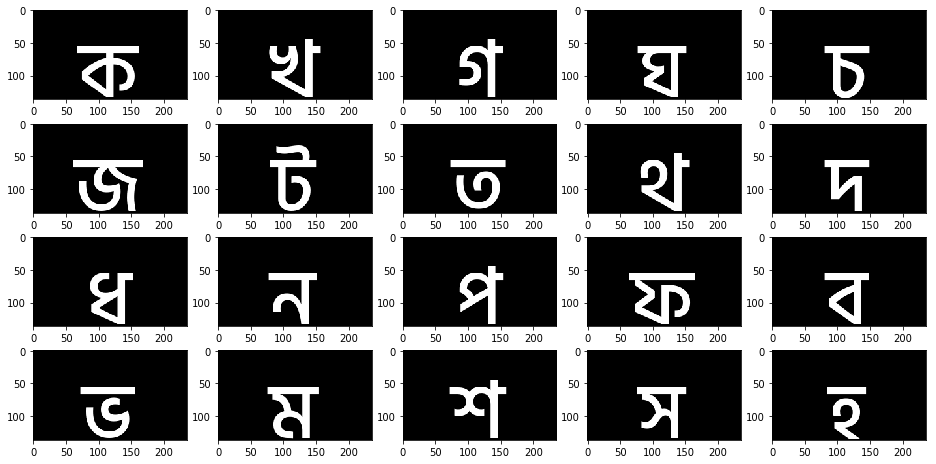

In [13]:
f, ax = plt.subplots(4, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(20):
    ax[i].imshow(image_from_char(common_gr.values[i]), cmap='Greys')

## Least common `grapheme_root` values

In [14]:
x = train_df['grapheme_root'].value_counts().sort_values()[:20].index
y = train_df['grapheme_root'].value_counts().sort_values()[:20].values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='Least common `grapheme_root` values')
fig.show()

In [15]:
notcommon_gr = class_map_df[(class_map_df['component_type'] == 'grapheme_root') & (class_map_df['label'].isin(x))]['component']

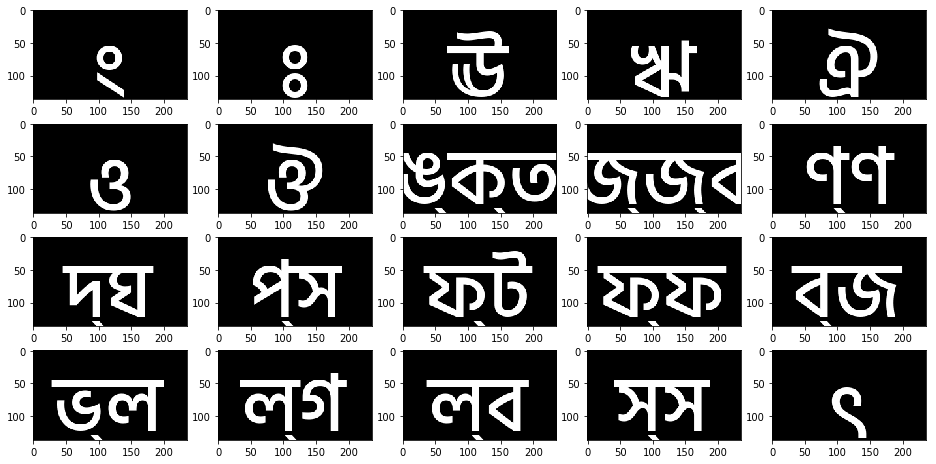

In [16]:
f, ax = plt.subplots(4, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(20):
    ax[i].imshow(image_from_char(notcommon_gr.values[i]), cmap='Greys')

# Vowel diacritic

In [17]:
train_df['vowel_diacritic'].nunique()

11

In [18]:
x = train_df['vowel_diacritic'].value_counts().sort_values().index
y = train_df['vowel_diacritic'].value_counts().sort_values().values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='`vowel_diacritic` values')
fig.show()

In [19]:
vowels = class_map_df[(class_map_df['component_type'] == 'vowel_diacritic') & (class_map_df['label'].isin(x))]['component']

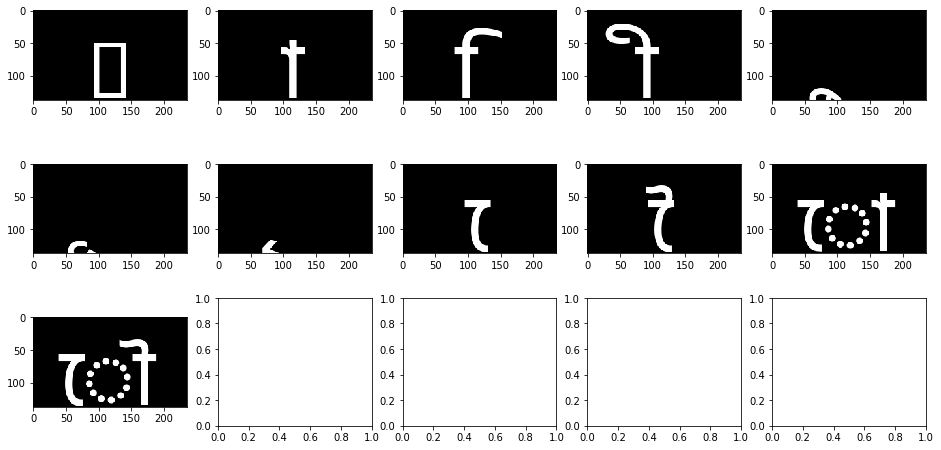

In [20]:
f, ax = plt.subplots(3, 5, figsize=(16, 8))
ax = ax.flatten()

for i in range(15):
    if i < len(vowels):
        ax[i].imshow(image_from_char(vowels.values[i]), cmap='Greys')

# Consonant diacritic

In [21]:
train_df['consonant_diacritic'].nunique()

7

In [22]:
x = train_df['consonant_diacritic'].value_counts().sort_values().index
y = train_df['consonant_diacritic'].value_counts().sort_values().values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='`consonant_diacritic` values')
fig.show()

In [23]:
consonants = class_map_df[(class_map_df['component_type'] == 'consonant_diacritic') & (class_map_df['label'].isin(x))]['component']

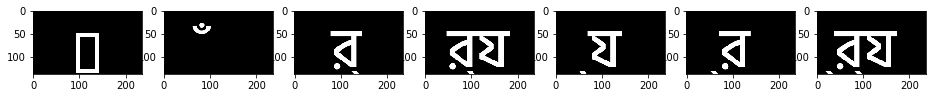

In [24]:
f, ax = plt.subplots(1, 7, figsize=(16, 8))
ax = ax.flatten()

for i in range(7):
    ax[i].imshow(image_from_char(consonants.values[i]), cmap='Greys')

# Similar Graphemes
The most common `grapheme_root` is `দ`. Let's check some variants.

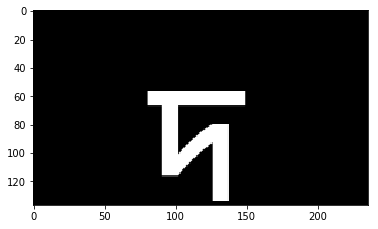

In [25]:
train_df = train_df[0:50000]

# Most common grapheme_root
gr_root_component = class_map_df[(class_map_df['component_type'] == 'grapheme_root') & (class_map_df['label'] == 72)]['component']
plt.imshow(image_from_char(gr_root_component[72]), cmap='Greys')

### Digital variants of the most common `grapheme_root`

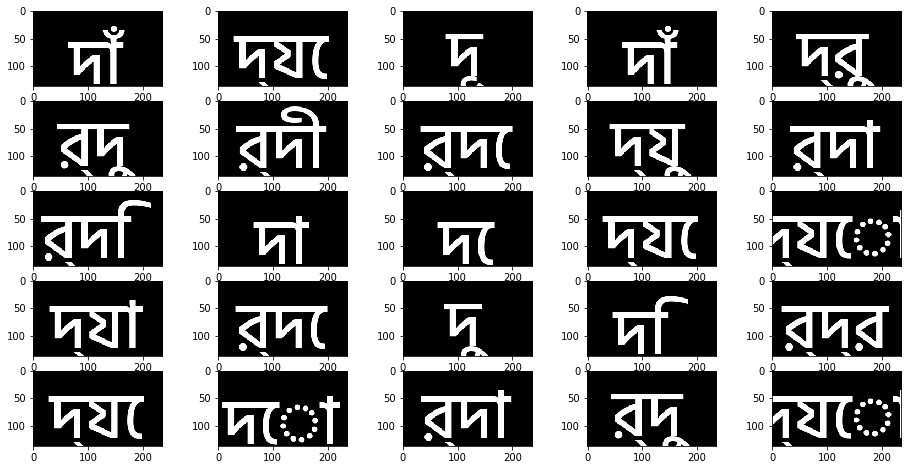

In [26]:
samples = train_df[train_df['grapheme_root'] == 72].sample(n=25)
# samples.reset_index(drop=True, inplace=True)

f, ax = plt.subplots(5, 5, figsize=(16, 8))
ax = ax.flatten()
k = 0
for i, row in samples.iterrows():
    ax[k].imshow(image_from_char(row['grapheme']), cmap='Greys')
    k = k + 1

### Handwritten variants of the most common `grapheme_root`

The samples below are the handwritten pairs of the digital ones above.

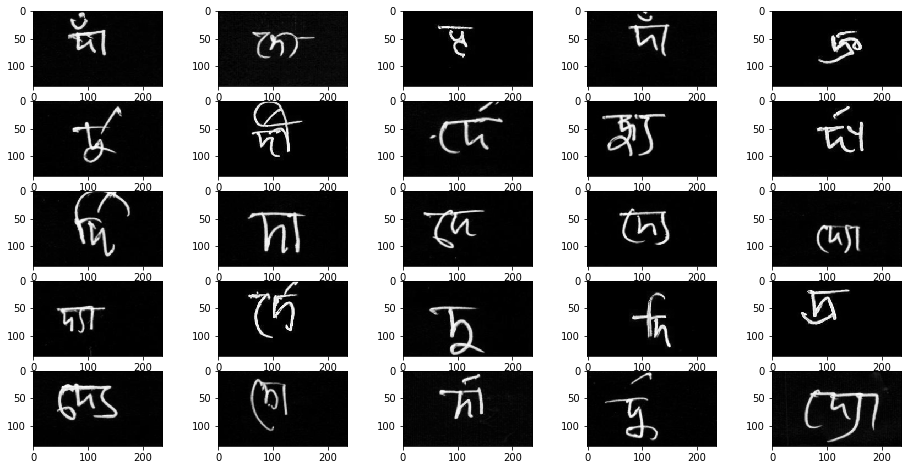

In [27]:
f, ax = plt.subplots(5, 5, figsize=(16, 8))
ax = ax.flatten()
k = 0
for i, row in samples.iterrows():
    ax[k].imshow(images0[i], cmap='Greys')
    k = k + 1

### Examples of grapheme root `দ` without vowel_diacritic and consonant_diacritic components.

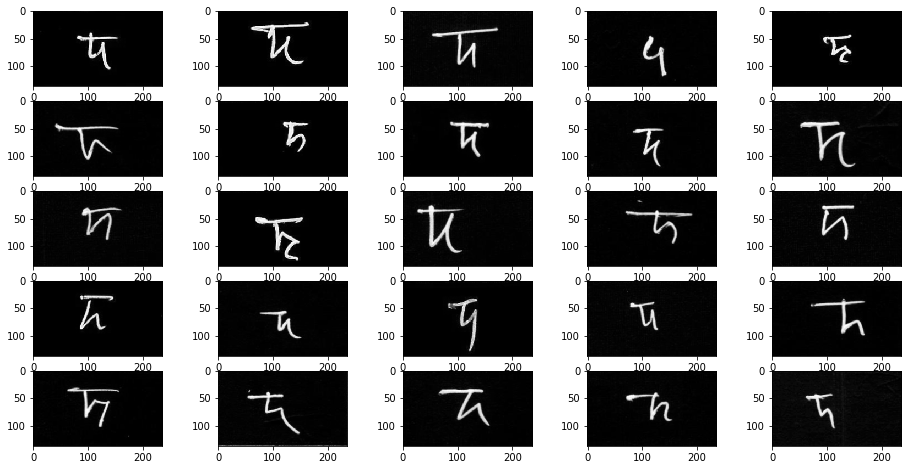

In [28]:
samples = train_df[
    (train_df['grapheme_root'] == 72) &
    (train_df['vowel_diacritic'] == 0) &
    (train_df['consonant_diacritic'] == 0)
].sample(n=25)

f, ax = plt.subplots(5, 5, figsize=(16, 8))
ax = ax.flatten()
k = 0
for i, row in samples.iterrows():
    ax[k].imshow(images0[i], cmap='Greys')
    k = k + 1